# Introduction to Machine Learning and Classification #
#### Presented by: Data Science Society ####
#### Authors: Roshan Lodha and Varun Murthy ####

<i> Credits: This notebook borrows heavily from the Data 100 lecture notebook. </i>

Topics covered:
- exploratory data analysis and feature selection / engineering
- loss functions
- gradient descent / logistic regression
- classification and measures of model integrity

## Introduction ##
Let's start by simply loading our packages and data. Lucky for us, sklearn provides many learning datasets that are already cleaned. Since data cleaning is not the focus of this workshop, we'll ignore this portion of the data science life cycle. 

In [1]:
#imports and loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.datasets
from scipy.optimize import minimize

data_raw = sklearn.datasets.load_breast_cancer()
breast_cancer_data = pd.DataFrame(data_raw['data'], columns=data_raw['feature_names'])
# Target data_dict['target'] = 0 is malignant; 1 is benign
breast_cancer_data['malignant'] = 1 - data_raw['target']

### Feature Selection and Engineering ###

Let's begin selecting our features by sifting through the data.

In [4]:
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


As noted in the introduction, the dataset is already cleaned. Thus, we note that there are no null values, and the counts of all the columns are equal. 

In [2]:
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Some key observations about this dataset: <br>
1) It's very cluttered. There are a lot of columns. <br>
2) The granularity is a tumor, as we would expect. <br>

Some important questions: <br>
1) What are we trying to figure out from this dataset? <br> The answer that sklearn gives us is whether or not the tumor is malignant. Alternatively, we can think about predicting other columns like tumor volume. 

Going back to the observations, lets analyze the columns more closely. 

In [3]:
breast_cancer_data.iloc[0]

mean radius                  17.990000
mean texture                 10.380000
mean perimeter              122.800000
mean area                  1001.000000
mean smoothness               0.118400
mean compactness              0.277600
mean concavity                0.300100
mean concave points           0.147100
mean symmetry                 0.241900
mean fractal dimension        0.078710
radius error                  1.095000
texture error                 0.905300
perimeter error               8.589000
area error                  153.400000
smoothness error              0.006399
compactness error             0.049040
concavity error               0.053730
concave points error          0.015870
symmetry error                0.030030
fractal dimension error       0.006193
worst radius                 25.380000
worst texture                17.330000
worst perimeter             184.600000
worst area                 2019.000000
worst smoothness              0.162200
worst compactness        

There are clearly a lot of factors in play, which (based on the column values) seem more or less independent from one another. We can check if this is true using seaborns pairplot function. 

In [ ]:
sns.pairplot(breast_cancer_data)

Some of the values have nearly linear relationships! Looking breifly through the pairplot, we can see that specifically row 1, col 3.

For the remainder of the notebook, we will ignore this correlation for the sake of simplicity, however this can have significant implications on our results.

<b>Before we continue, breifly glance across the bottom row of the pairplot, and think about that that row represents and how we can use it for feature selection.</b>

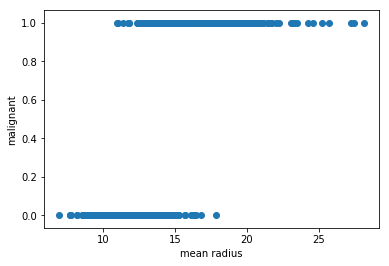

In [5]:
plt.xlabel('mean radius')
plt.ylabel('malignant')
plt.scatter(breast_cancer_data['mean radius'], breast_cancer_data['malignant']);

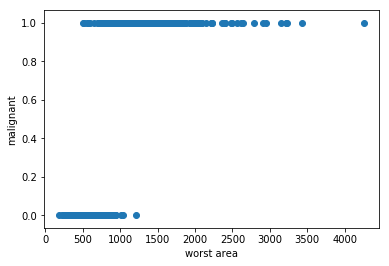

In [6]:
plt.xlabel('worst area')
plt.ylabel('malignant')
plt.scatter(breast_cancer_data['worst area'], breast_cancer_data['malignant']);

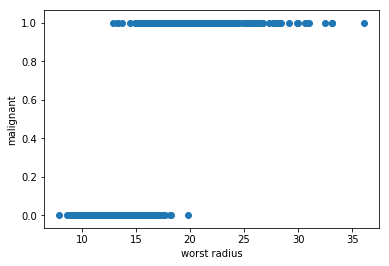

In [7]:
plt.xlabel('worst radius')
plt.ylabel('malignant')
plt.scatter(breast_cancer_data['worst radius'], breast_cancer_data['malignant']);

We can better approximate the probabilities associated with these features by binning the radii, and calculating the proportion of malignant tumors in each bin.

<i>Credit: Data 100 Staff</i>

/Users/roshanlodha/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roshanlodha/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


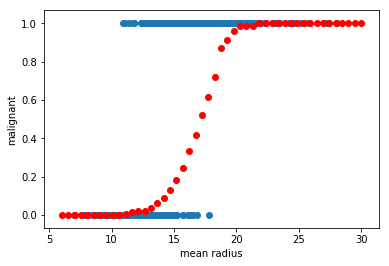

In [8]:
#binned data logistic simulation
radii = np.linspace(5, 30, 50)
averages = [np.average(breast_cancer_data[np.abs(breast_cancer_data['worst radius']-r)<2]['malignant']) for r in radii]
plt.xlabel('mean radius')
plt.ylabel('malignant')
plt.scatter(breast_cancer_data['mean radius'], breast_cancer_data['malignant']);
plt.scatter(radii, averages, color='red');

In [9]:
#added bias column
breast_cancer_data['bias'] = 1.0 

### Classification ###

Now that we have selected our features, we can start learning! The first thing we need to do is split the data. This can be easily done using sklearn's train_test_split library.

In [10]:
#prepwork for classification
from sklearn.model_selection import train_test_split

train, test = train_test_split(breast_cancer_data, test_size=0.25, random_state=100)
print("Training Data Size: ", len(train))
print("Test Data Size: ", len(test))

Training Data Size:  426
Test Data Size:  143


Based on the EDA we did above, lets select some features. Think back onto the pairplot, and which features you think work best, and try them below.

In [12]:
#selecting features explain the code in this cell, specifically x_train/y_train
def features(t):
    return t[['bias', 'mean radius', 'worst radius', 'worst area']].values.T
    
x_train, y_train = features(train), train['malignant'].values

The last thing we need to do is fit the data. Again, this can be easily done using sklearn's LogisticRegression library.

The math behind this is fairly complex; we will talk about loss minimization and what sklearn is doing behind the scenes while our model is built below. <br>

Specifically, we will discuss: <br>
1) What do the numbers below mean. <br>
2) What are the different loss functions, and why sigmoid loss is used in classification. <br>
3) How the loss is being minimized. <br>
4) How can we use the model below to classify future inputs.

In [14]:
from sklearn.linear_model import LogisticRegression

breast_cancer_model = LogisticRegression(fit_intercept=False, C=1e9, solver='lbfgs')
breast_cancer_model.fit(x_train.T, y_train)
breast_cancer_model_features = breast_cancer_model.coef_[0]
breast_cancer_model_features

array([ 0.01753887, -1.72729267,  0.45556362,  0.02089606])

In [15]:
def sigma(t):
    return 1 / (1 + np.e**(-t))

The predictions are in 4D space. Lets take 2D cross sections of them and see whats going on.

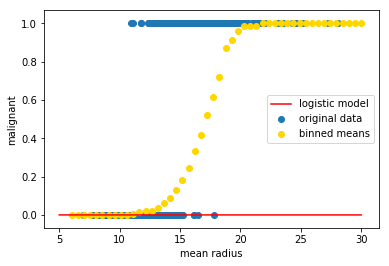

In [16]:
plt.scatter(train['mean radius'], train['malignant'], label = 'original data');
plt.xlabel('mean radius')
plt.ylabel('malignant')
plt.scatter(radii, averages, color='gold', label = 'binned means');
plt.plot(radii, sigma(breast_cancer_model_features[0] + radii * breast_cancer_model_features[1]), color='r', label = 'logistic model');
plt.legend();

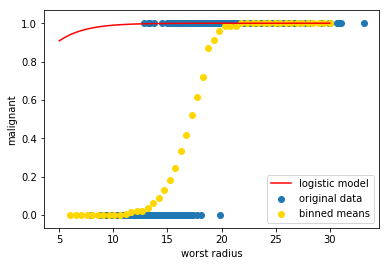

In [17]:
plt.scatter(train['worst radius'], train['malignant'], label = 'original data');
plt.xlabel('worst radius')
plt.ylabel('malignant')
plt.scatter(radii, averages, color='gold', label = 'binned means');
plt.plot(radii, sigma(breast_cancer_model_features[0] + radii * breast_cancer_model_features[2]), color='r', label = 'logistic model');
plt.legend();

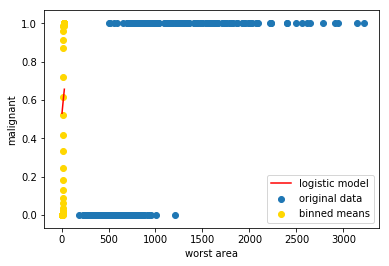

In [18]:
plt.scatter(train['worst area'], train['malignant'], label = 'original data');
plt.xlabel('worst area')
plt.ylabel('malignant')
plt.scatter(radii, averages, color='gold', label = 'binned means');
plt.plot(radii, sigma(breast_cancer_model_features[0] + radii * breast_cancer_model_features[3]), color='r', label = 'logistic model');
plt.legend();

Clearly, none of our regression lines fit very well with the data. Is this bad? <br>
No! this just suggests that none of our features are clearly dominating over the other ones!<br>
With that out of the way, lets start predicting!

### Predicting ###

Let's first define some helper functions, predict_prob and classify.

<i>Credit: Data 100 Staff </i>

In [19]:
def predict_prob(X, betas = breast_cancer_model_features):
    return sigma(X.T @ betas)

def classify(probabilities, threshold = 0.5):
    return np.int64(probabilities > threshold)

In the classify function, we see a "threshold." This simply tells the function the raw probability value that marks the cutoff between malignant and benign tumors. 

In [20]:
#predicting our trained values
train_predicted = classify(predict_prob(x_train))
train_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,

We can messure how many predictions our model got right or wrong using measures like accuracy, precision, and recall. Shown below is the accuracy. 

In [21]:
#trained data accuracy
trianing_acc = np.sum(train_predicted == y_train) / len(train_predicted)
trianing_acc

0.9248826291079812

### Assessing The Model  ###
First, we should check how well our model did on test data. 

In [24]:
x_test, y_test = features(test), test['malignant'].values
test_predicted = classify(predict_prob(x_test))
test_acc = np.sum(test_predicted == y_test) / len(test_predicted)
test_acc

0.951048951048951

We can now go back to assess how the threshold affects the accuracy. 

In [25]:
#try different tresholds here
test_predicted = classify(predict_prob(x_test), threshold = .8)
test_acc = np.sum(test_predicted == y_test) / len(test_predicted)
test_acc

0.965034965034965

What can't we just pick the treshold that gives us the highest accuracy?<br>
We must also measure the precision and recall, which should be maximized depending on the problem asked. 

<i>Credit: Data 100 Staff</i>

In [27]:
#precision and recall
def precision_recall(classified, actual):
    # It's not necessary to define each of these in both the function for precision
    # and recall, but they're here just for the sake of clarity
    tp = sum((actual == classified) & (actual == 1))
    tn = sum((actual == classified) & (actual == 0))
    fp = sum((actual != classified) & (actual == 0))
    fn = sum((actual != classified) & (actual == 1))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return precision, recall

precision, recall = precision_recall(test_predicted, y_test)
print('precision = ', precision)
print('recall = ', recall)

precision =  1.0
recall =  0.9107142857142857


That concludes our walkthrough of machine learning! Through this notebook, we both explored a dataset, selected and engineered features, and even built a model and assessed how well it functioned. 